In [17]:
#%matplotlib inline
%matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [18]:
#SOM人工データ
x = np.arange(-3, 3, 0.1)
n = len(x)

y = np.sin(x)

X = np.stack([x, y], 1)
X

array([[-3.00000000e+00, -1.41120008e-01],
       [-2.90000000e+00, -2.39249329e-01],
       [-2.80000000e+00, -3.34988150e-01],
       [-2.70000000e+00, -4.27379880e-01],
       [-2.60000000e+00, -5.15501372e-01],
       [-2.50000000e+00, -5.98472144e-01],
       [-2.40000000e+00, -6.75463181e-01],
       [-2.30000000e+00, -7.45705212e-01],
       [-2.20000000e+00, -8.08496404e-01],
       [-2.10000000e+00, -8.63209367e-01],
       [-2.00000000e+00, -9.09297427e-01],
       [-1.90000000e+00, -9.46300088e-01],
       [-1.80000000e+00, -9.73847631e-01],
       [-1.70000000e+00, -9.91664810e-01],
       [-1.60000000e+00, -9.99573603e-01],
       [-1.50000000e+00, -9.97494987e-01],
       [-1.40000000e+00, -9.85449730e-01],
       [-1.30000000e+00, -9.63558185e-01],
       [-1.20000000e+00, -9.32039086e-01],
       [-1.10000000e+00, -8.91207360e-01],
       [-1.00000000e+00, -8.41470985e-01],
       [-9.00000000e-01, -7.83326910e-01],
       [-8.00000000e-01, -7.17356091e-01],
       [-7.

<IPython.core.display.Javascript object>


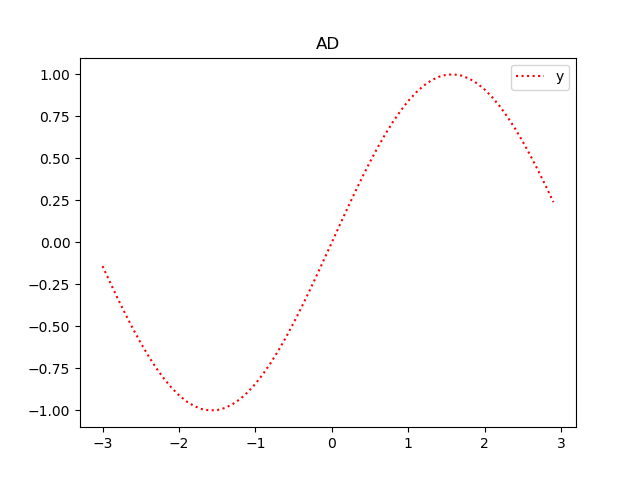

In [19]:
plt.plot(x, y,'r:',label="y")
plt.title('AD')
plt.legend()
plt.show()

In [20]:
#近傍半径の設定
sig_zero = 1.0
sig_min = 0.05
Tau = 50.0
sig = 0
sig_t = []

#for sig > sig_min:
for t in range(n):
    sig_max = sig_zero-(sig_zero-sig_min) * t / Tau
    if sig_max > sig_min:
        sig = sig_max
    else:
        sig = sig_min
    sig_t.append(sig)
    sig_zero = sig_max
print(sig_t)
len(sig_t)

[1.0, 0.981, 0.9437599999999999, 0.8901344, 0.822923648, 0.7456312831999999, 0.662155529216, 0.57645375512576, 0.4922211543056384, 0.4126213465306235, 0.3400970772244988, 0.27627572023510905, 0.22196954737868288, 0.17725746506022533, 0.14162537484336224, 0.11413776239035357, 0.09361367842544044, 0.07878502776079069, 0.06842241776690604, 0.06142189901548174, 0.056853139409289044, 0.05397482085738765, 0.052225899680137085, 0.051201985827274026, 0.0506250326301825, 0.050312516315091246, 0.0501500078312438, 0.050069003602372146, 0.050030361585043745, 0.05001275186571837, 0.05000510074628735, 0.050001938283589197, 0.05000069778209211, 0.05000023724591132, 0.05000007591869163, 0.05000002277560749, 0.0500000063771701, 0.05000000165806423, 0.05000000039793542, 0.05000000008754579, 0.050000000017509164, 0.05000000000315165, 0.050000000000504266, 0.0500000000000706, 0.050000000000008475, 0.05000000000000085, 0.05000000000000007, 0.05000000000000001, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05

60

In [35]:
sigma_max + (sigma_min - sigma_max) * (2 / Tau2)

0.962

In [34]:
sig2 = []
sigma_max = 1.0
sigma_min = 0.05
Tau2 = 50.0
sigma = 0
for t2 in range(60):
    sigma = sigma_max + (sigma_min - sigma_max) * (t2 / Tau2)
    if sigma > 0.05:
        sig2.append(sigma)
    else:
        sig2.append(sigma_min)
    #sig2.append(sigma_min + (sigma_max - sigma_min) * np.exp(- t2 / Tau2))
sig2    

[1.0,
 0.981,
 0.962,
 0.9430000000000001,
 0.924,
 0.905,
 0.886,
 0.867,
 0.848,
 0.829,
 0.81,
 0.791,
 0.772,
 0.753,
 0.734,
 0.7150000000000001,
 0.696,
 0.677,
 0.658,
 0.639,
 0.62,
 0.601,
 0.5820000000000001,
 0.563,
 0.544,
 0.525,
 0.506,
 0.487,
 0.46799999999999997,
 0.44900000000000007,
 0.43000000000000005,
 0.41100000000000003,
 0.392,
 0.373,
 0.354,
 0.3350000000000001,
 0.31600000000000006,
 0.29700000000000004,
 0.278,
 0.259,
 0.24,
 0.22100000000000009,
 0.20200000000000007,
 0.18300000000000005,
 0.16400000000000003,
 0.14500000000000002,
 0.126,
 0.1070000000000001,
 0.08800000000000008,
 0.06900000000000006,
 0.050000000000000044,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05]

<IPython.core.display.Javascript object>


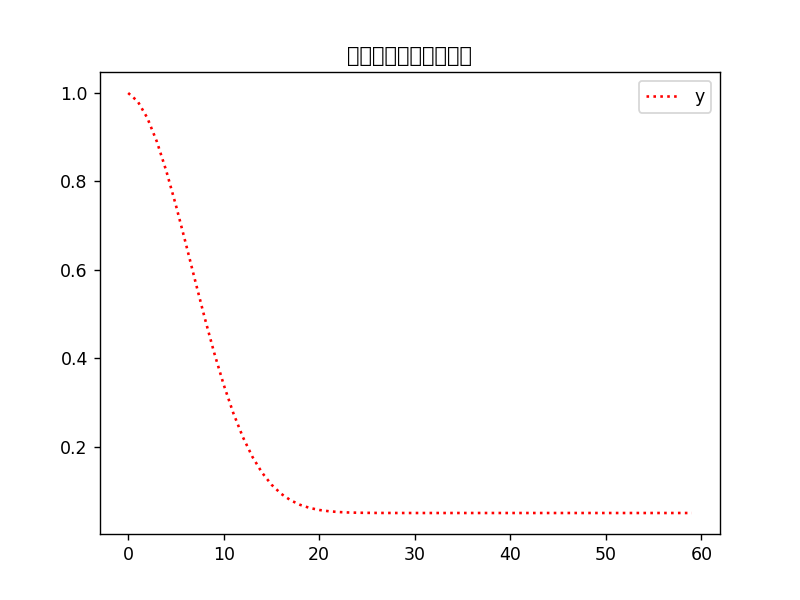

In [5]:
a = np.arange(60)
plt.plot(a, sig_t,'r:',label="y")
plt.title('近傍半径スケジュール')
plt.legend()
plt.show()

In [6]:
#ノード設定
K = 50
l = 1
zeta = np.linspace(-1,1,K)
zeta = np.reshape(zeta, (50,1))
print(zeta)

[[-1.        ]
 [-0.95918367]
 [-0.91836735]
 [-0.87755102]
 [-0.83673469]
 [-0.79591837]
 [-0.75510204]
 [-0.71428571]
 [-0.67346939]
 [-0.63265306]
 [-0.59183673]
 [-0.55102041]
 [-0.51020408]
 [-0.46938776]
 [-0.42857143]
 [-0.3877551 ]
 [-0.34693878]
 [-0.30612245]
 [-0.26530612]
 [-0.2244898 ]
 [-0.18367347]
 [-0.14285714]
 [-0.10204082]
 [-0.06122449]
 [-0.02040816]
 [ 0.02040816]
 [ 0.06122449]
 [ 0.10204082]
 [ 0.14285714]
 [ 0.18367347]
 [ 0.2244898 ]
 [ 0.26530612]
 [ 0.30612245]
 [ 0.34693878]
 [ 0.3877551 ]
 [ 0.42857143]
 [ 0.46938776]
 [ 0.51020408]
 [ 0.55102041]
 [ 0.59183673]
 [ 0.63265306]
 [ 0.67346939]
 [ 0.71428571]
 [ 0.75510204]
 [ 0.79591837]
 [ 0.83673469]
 [ 0.87755102]
 [ 0.91836735]
 [ 0.95918367]
 [ 1.        ]]


In [7]:
#潜在変数の初期化
zn = np.random.rand(n)
zn = np.reshape(zn, (n,1))
zn

array([[0.47025727],
       [0.41490665],
       [0.65318183],
       [0.72226185],
       [0.98482407],
       [0.91463527],
       [0.89484353],
       [0.74726994],
       [0.12910415],
       [0.4160221 ],
       [0.71035845],
       [0.47112488],
       [0.29478116],
       [0.5710523 ],
       [0.45781335],
       [0.84472873],
       [0.52885983],
       [0.23857785],
       [0.33742813],
       [0.89711391],
       [0.92062032],
       [0.65265809],
       [0.48288622],
       [0.42865194],
       [0.59223388],
       [0.9471034 ],
       [0.79367852],
       [0.83656618],
       [0.32042929],
       [0.47887398],
       [0.62349182],
       [0.33504992],
       [0.137062  ],
       [0.95605091],
       [0.09277425],
       [0.93786633],
       [0.12086825],
       [0.74857656],
       [0.93122583],
       [0.77187338],
       [0.13329711],
       [0.40215331],
       [0.86537617],
       [0.14415224],
       [0.64804784],
       [0.19232966],
       [0.0231188 ],
       [0.569

In [8]:
#学習率初期設定
h_kn = np.zeros((n,K))
np.size(h_kn,axis=0)

60

In [10]:
#ノード毎学習率合計変数の初期設定
g_k = np.zeros((K))
g_k = np.reshape(g_k,(K,1))
g_k[0]

array([0.])

In [11]:
#参照ベクトル初期設定
y_k = np.zeros((K,2))
y_k = np.reshape(y_k, (K,2))
y_k[0]

array([0., 0.])

In [12]:
#参照ベクトル計算の中で使う変数の初期設定
h_X = np.zeros((n,2))
h_X = np.reshape(h_X, (n,2))
h_X[0]

array([0., 0.])

In [13]:
#潜在変数初期設定
k_n = np.zeros((n))
k_n = np.reshape(k_n, (n,1))
k_n[0]

array([0.])

In [14]:
#潜在変数計算の中で使う
xn_yk = np.zeros((K))
xn_yk

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

<IPython.core.display.Javascript object>


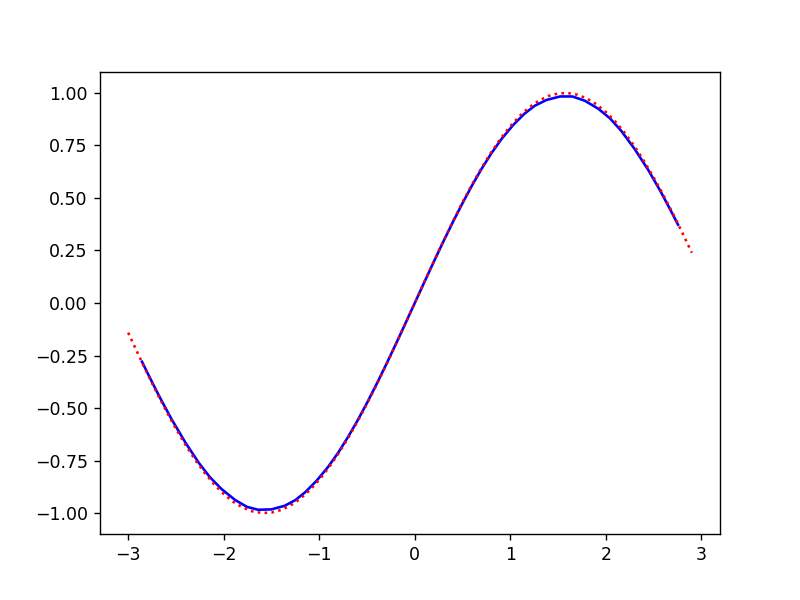

In [15]:
T = 60
fig = plt.figure()
ims = []

for time in range(T):
    for data in range(n):
        for node in range(K):
            h_kn[data][node] = np.exp( -1 / (2*np.power(sig_t[time], 2)) * np.power(zn[data]-zeta[node],2))
    
    for node in range(K):
        g_k[node] = np.sum(h_kn[:,node])
    
    for node in range(K):
        for data in range(n):
            h_X[data] = h_kn[data][node]*X[data]
        y_k[node] = 1/g_k[node] * np.sum(h_X,axis=0)
    
    for data in range(n):
        xn_yk_min = np.power(X[data][0] - y_k[0][0], 2) + np.power(X[data][1] - y_k[0][1], 2)
        Nd = 0
        for node in range(1,K):
            xn_yk = np.power(X[data][0] - y_k[node][0], 2) + np.power(X[data][1] - y_k[node][1], 2)
            if xn_yk_min > xn_yk:
                xn_yk_min = xn_yk
                Nd = node
        k_n[data] = Nd
        
    for data in range(n):
        zn[data] = zeta[int(k_n[data])]    
    #print(time)
    im = plt.plot(y_k[:,0] ,y_k[:,1] ,c = "b")
    ims.append(im)
    
#print(h_kn)
#print(g_k)
#print(y_k)
#print(k_n)

ani = animation.ArtistAnimation(fig, ims, interval = 100)
plt.plot(x, y,'r:',label="y")
plt.show()